In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns

In [2]:
df=pd.read_csv('Data/cancat.csv')

In [3]:
df

,No,Region,District,D/S Office,Date of Death,Cause of Death,Sex,Age,Age Category
0,1,Southern,Monaragala,Kataragama,2010-01-01,Body destroyed,Male,50-55,Subadults and adults
1,2,Southern,Monaragala,Thanamalvila,2010-01-07,Unknown,Male,20,Subadults and adults
2,3,North Western,Anuradhapura,Unknown,2010-01-08,Electrocuted,Male,30-35,Subadults and adults
3,4,Eastern,Ampara,Thirikkovil,2010-01-12,Gunshot,Female,15-20,Subadults and adults
4,5,North Western,Kurunegala,Ipologama,2010-01-15,Accident,Male,5,Juvenile
...,...,...,...,...,...,...,...,...,...
1889,1890,Elephant Transit Home,Ratnapura,Unknown,2017-12-28,Natural,Female,Unknown,Unknown
1890,1891,Southern,Ratnapura,Weligepola,2017-12-28,Body destroyed,Male,25,Subadults and adults
1891,1892,Anuradhapura,Anuradhapura,Kabithigollawa,2017-12-28,Body destroyed,Female,20,Subadults and adults
1892,1893,Trincomalee,Trincomalee,Kanthale,2017-12-29,Electrocuted,Unknown,25-30,Subadults and adults


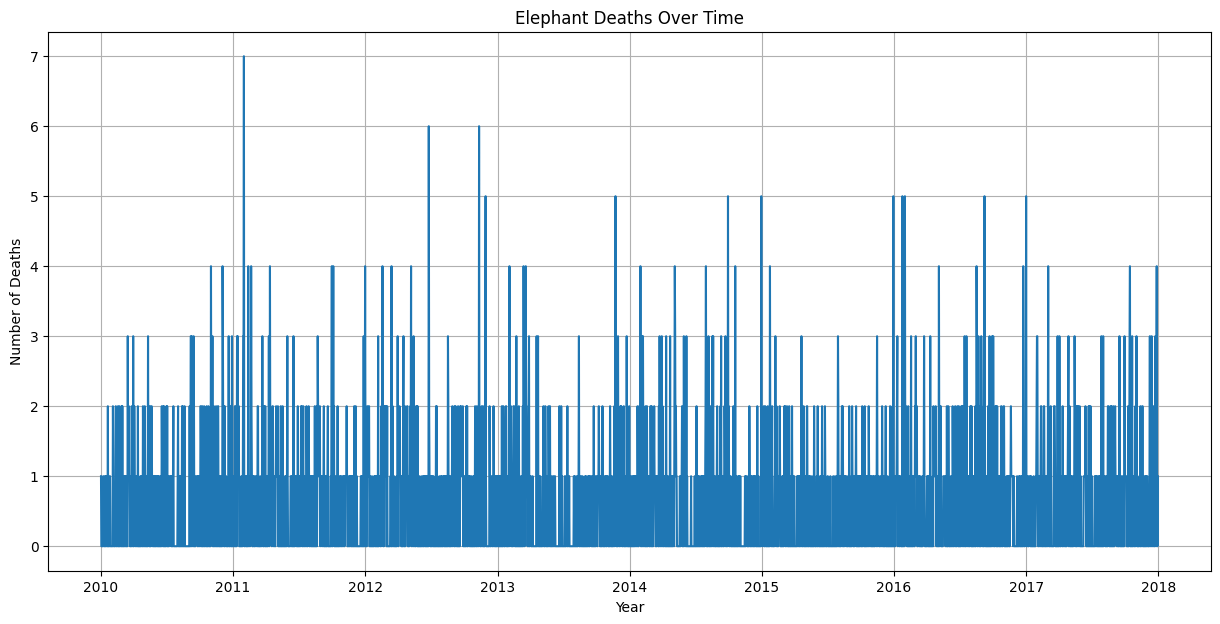

In [4]:
df['Date of Death'] = pd.to_datetime(df['Date of Death'])

# Set the 'Date of Death' column as the index for time series analysis
DF=df.set_index('Date of Death', inplace=False)

# Resample the data to get the count of elephant deaths by year
elephant_deaths_by_daily = DF['No'].resample('D').count()

# Plot the time series of elephant deaths over the years
plt.figure(figsize=(15, 7))
plt.plot(elephant_deaths_by_daily)
plt.title('Elephant Deaths Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Deaths')
plt.grid(True)
plt.show()

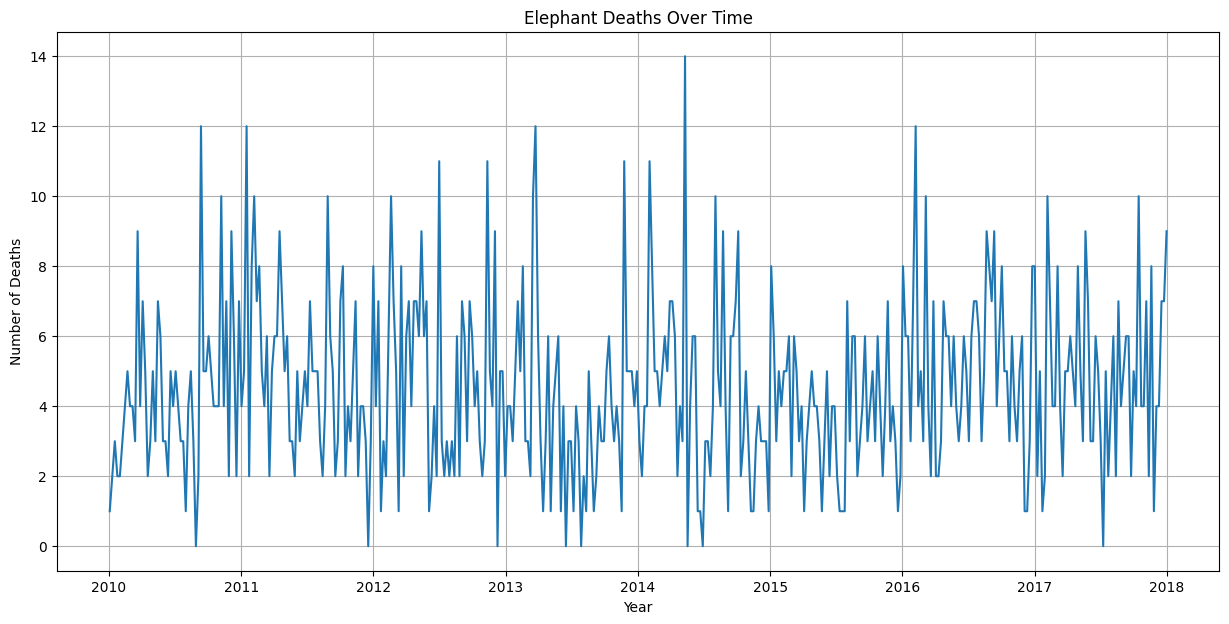

In [5]:
df['Date of Death'] = pd.to_datetime(df['Date of Death'])

# Set the 'Date of Death' column as the index for time series analysis
DF=df.set_index('Date of Death', inplace=False)

# Resample the data to get the count of elephant deaths by year
elephant_deaths_by_weekly = DF['No'].resample('W').count()

# Plot the time series of elephant deaths over the years
plt.figure(figsize=(15, 7))
plt.plot(elephant_deaths_by_weekly)
plt.title('Elephant Deaths Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Deaths')
plt.grid(True)
plt.show()

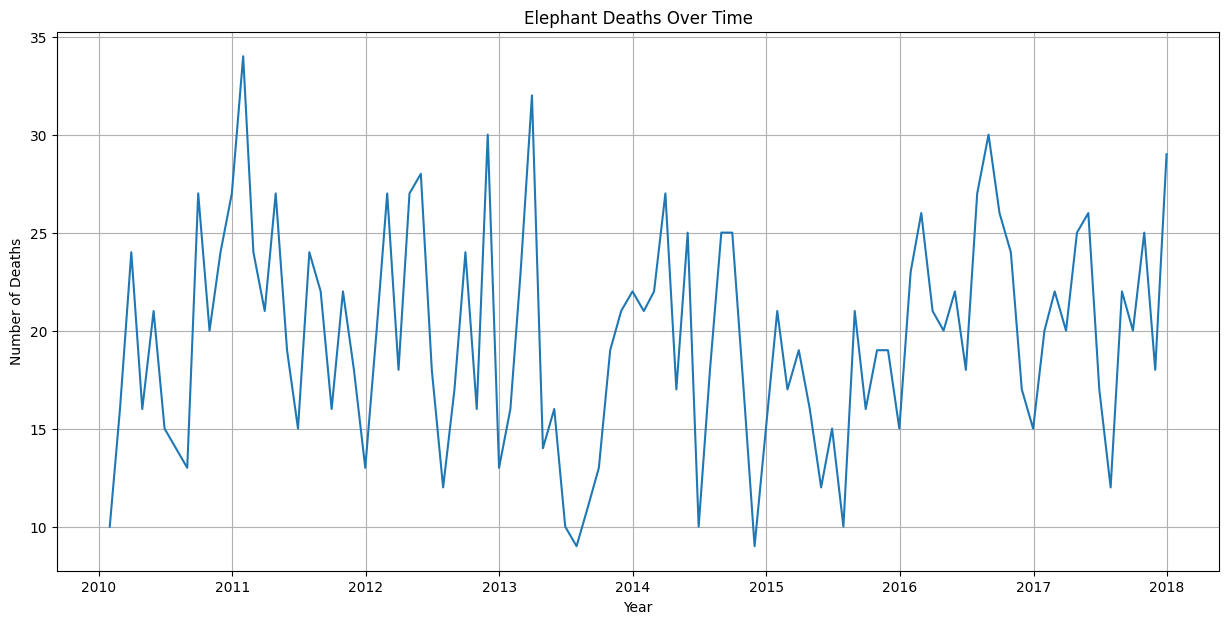

In [6]:
df['Date of Death'] = pd.to_datetime(df['Date of Death'])

# Set the 'Date of Death' column as the index for time series analysis
DF=df.set_index('Date of Death', inplace=False)

# Resample the data to get the count of elephant deaths by year
elephant_deaths_by_Monthly = DF['No'].resample('M').count()

# Plot the time series of elephant deaths over the years
plt.figure(figsize=(15, 7))
plt.plot(elephant_deaths_by_Monthly)
plt.title('Elephant Deaths Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Deaths')
plt.grid(True)
plt.show()

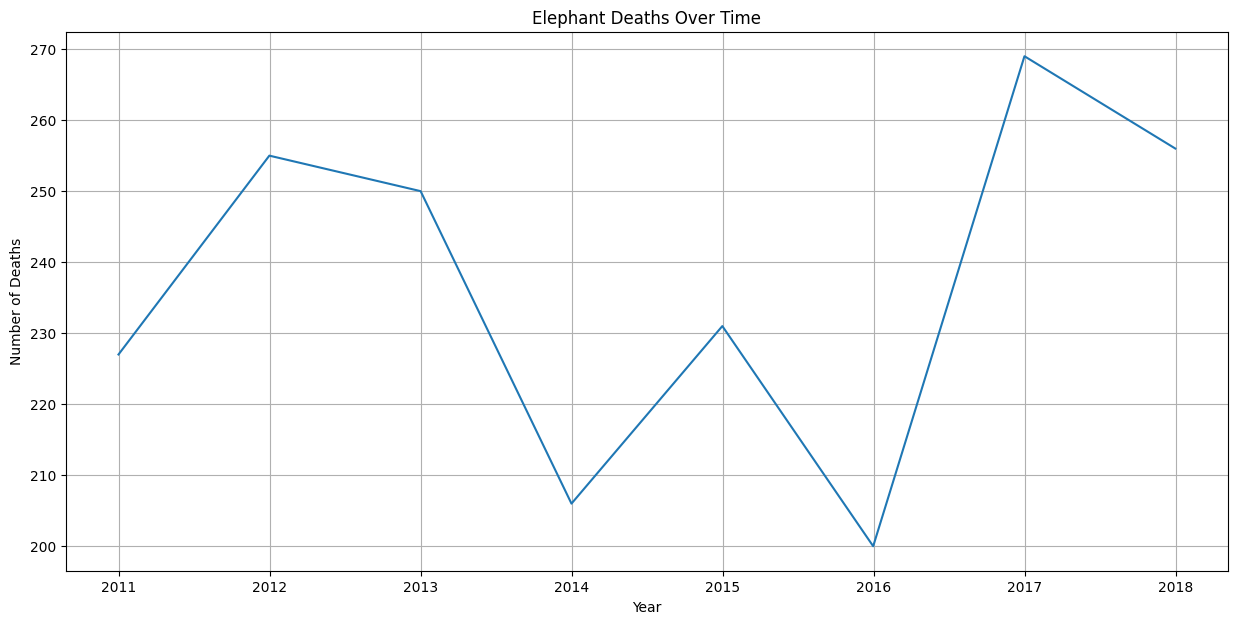

In [7]:
df['Date of Death'] = pd.to_datetime(df['Date of Death'])

# Set the 'Date of Death' column as the index for time series analysis
DF=df.set_index('Date of Death', inplace=False)

# Resample the data to get the count of elephant deaths by year
elephant_deaths_by_year = DF['No'].resample('Y').count()

# Plot the time series of elephant deaths over the years
plt.figure(figsize=(15, 7))
plt.plot(elephant_deaths_by_year)
plt.title('Elephant Deaths Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Deaths')
plt.grid(True)
plt.show()

+ Convert the 'Date of Death' column to a datetime format and set it as the index for time series analysis.
+ Resample the data to get the count of elephant deaths by year.
+ Plot the time series of elephant deaths over the years.

+ Decompose the time series into trend, seasonal, and residual components using seasonal decomposition.
+ Plot the decomposed components to visualize any underlying patterns.

+ By resampling data at a monthly frequency,  can better capture any monthly seasonality patterns, trends, or variations in elephant deaths

In [25]:
#Determing rolling statistics
rolmean=elephant_deaths_by_Monthly.rolling(window=12).mean()
rolstd=elephant_deaths_by_Monthly.rolling(window=12).std()

print(rolmean,rolstd)

Date of Death
2010-01-31          NaN
2010-02-28          NaN
2010-03-31          NaN
2010-04-30          NaN
2010-05-31          NaN
                ...    
2017-08-31    20.500000
2017-09-30    20.000000
2017-10-31    20.083333
2017-11-30    20.166667
2017-12-31    21.333333
Freq: M, Name: No, Length: 96, dtype: float64 Date of Death
2010-01-31         NaN
2010-02-28         NaN
2010-03-31         NaN
2010-04-30         NaN
2010-05-31         NaN
                ...   
2017-08-31    4.522670
2017-09-30    4.177864
2017-10-31    4.273775
2017-11-30    4.217568
2017-12-31    4.579268
Freq: M, Name: No, Length: 96, dtype: float64


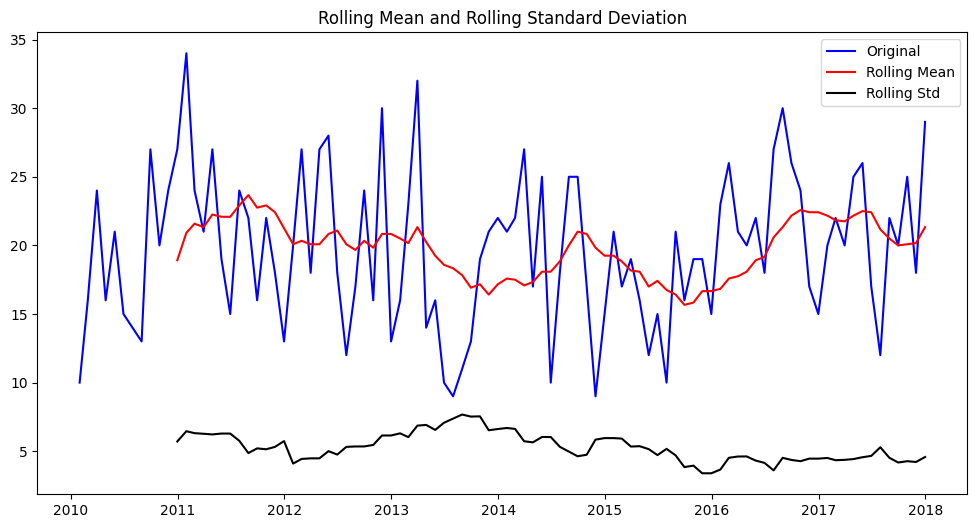

In [26]:
#plot rolling statistics
plt.figure(figsize=(12, 6))
orig=plt.plot(elephant_deaths_by_Monthly,color='blue',label='Original')
mean=plt.plot(rolmean,color='red',label='Rolling Mean')
std=plt.plot(rolstd,color='black',label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean and Rolling Standard Deviation')
plt.show(block=False)

+ Mean and Std are not constant ,here data is not stationary

In [28]:
elephant_deaths_by_Monthly

Date of Death
2010-01-31    10
2010-02-28    16
2010-03-31    24
2010-04-30    16
2010-05-31    21
              ..
2017-08-31    22
2017-09-30    20
2017-10-31    25
2017-11-30    18
2017-12-31    29
Freq: M, Name: No, Length: 96, dtype: int64

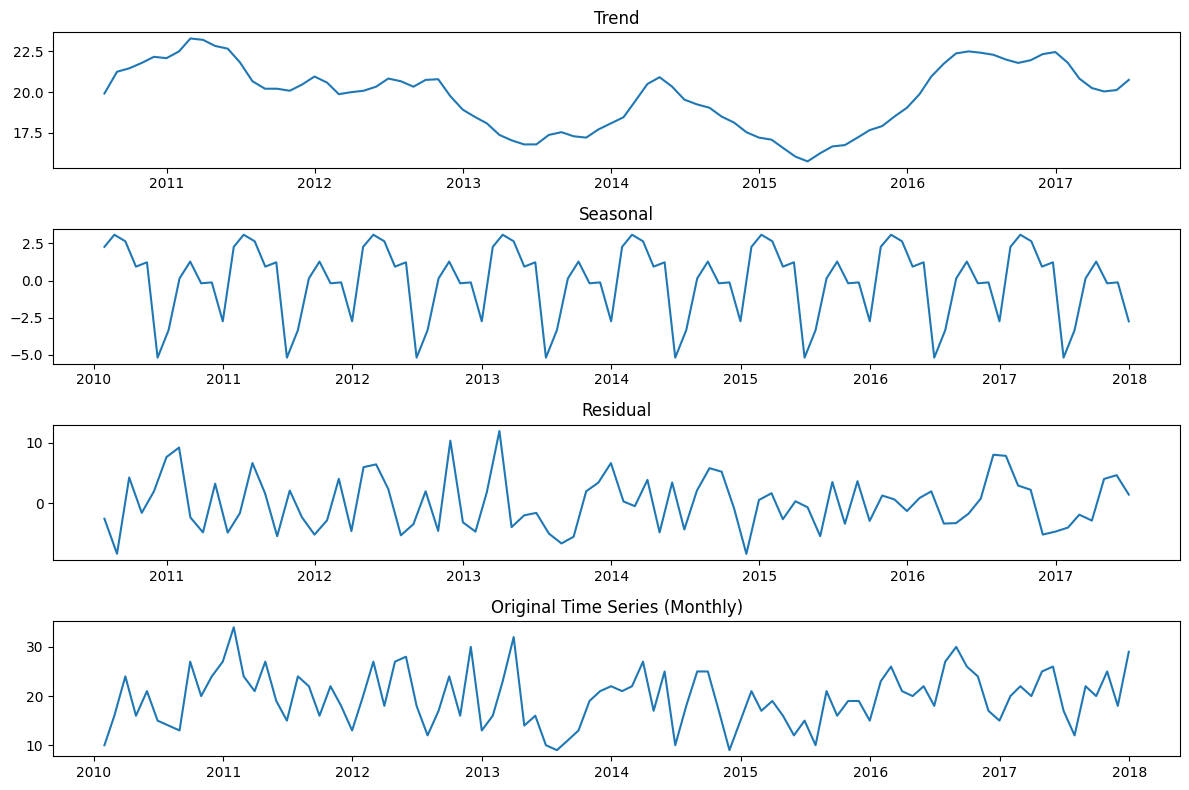

In [30]:
# Decompose the time series with monthly granularity
decomposition = seasonal_decompose(elephant_deaths_by_Monthly, model='additive')

# Plot the decomposed components (trend, seasonal, and residual) for the monthly data
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(decomposition.trend)
plt.title('Trend')
plt.subplot(412)
plt.plot(decomposition.seasonal)
plt.title('Seasonal')
plt.subplot(413)
plt.plot(decomposition.resid)
plt.title('Residual')
plt.subplot(414)
plt.plot(elephant_deaths_by_Monthly)
plt.title('Original Time Series (Monthly)')
plt.tight_layout()
plt.show()

## Region wise Time series Analysis

In [31]:
''' df['Date of Death'] = pd.to_datetime(df['Date of Death'])

# Group data by region and calculate the count of deaths in each region
region_counts = df['Region'].value_counts()

top_5_regions = region_counts.head(5).index

# Create subplots for each of the top 5 regions
fig, axes = plt.subplots(5, 1, figsize=(15, 7), sharex=True)

for i, region in enumerate(top_5_regions):
    region_data = df[df['Region'] == region]
    region_data = region_data.resample('M', on='Date of Death').count()
    
    axes[i].plot(region_data.index, region_data['Region'], label=region)
    axes[i].set_title(f'Time Series for {region}')
    axes[i].set_ylabel('Count')
   

# Set a common x-axis label for the entire plot
axes[-1].set_xlabel('Date')

plt.tight_layout()
plt.show()
'''

" df['Date of Death'] = pd.to_datetime(df['Date of Death'])\n\n# Group data by region and calculate the count of deaths in each region\nregion_counts = df['Region'].value_counts()\n\ntop_5_regions = region_counts.head(5).index\n\n# Create subplots for each of the top 5 regions\nfig, axes = plt.subplots(5, 1, figsize=(15, 7), sharex=True)\n\nfor i, region in enumerate(top_5_regions):\n    region_data = df[df['Region'] == region]\n    region_data = region_data.resample('M', on='Date of Death').count()\n    \n    axes[i].plot(region_data.index, region_data['Region'], label=region)\n    axes[i].set_title(f'Time Series for {region}')\n    axes[i].set_ylabel('Count')\n   \n\n# Set a common x-axis label for the entire plot\naxes[-1].set_xlabel('Date')\n\nplt.tight_layout()\nplt.show()\n"

# 2010

In [33]:
df2010=pd.read_csv(r'data/2010_clean.csv')

In [34]:
df2010

,No,Region,District,D/S Office,Date of Death,Cause of Death,Sex,Age,Age Category
0,1,Southern,Monaragala,Kataragama,2010-01-01,Body destroyed,Male,50-55,Subadults and adults
1,2,Southern,Monaragala,Thanamalvila,2010-01-07,Unknown,Male,20,Subadults and adults
2,3,North Western,Anuradhapura,Unknown,2010-01-08,Electrocuted,Male,30-35,Subadults and adults
3,4,Eastern,Ampara,Thirikkovil,2010-01-12,Gunshot,Female,15-20,Subadults and adults
4,5,North Western,Kurunegala,Ipologama,2010-01-15,Accident,Male,5,Juvenile
...,...,...,...,...,...,...,...,...,...
222,223,Polonnaruwa,Polonnaruwa,Welikanda,2010-12-25,Other,Male,15-20,Subadults and adults
223,224,Southern,Ratnapura,Embilipitiya,2010-12-29,Unknown,Male,1 Month,Infant
224,225,North Western,Puttalam,Nawagaththegama,2010-12-29,Gunshot,Male,35-40,Subadults and adults
225,226,Eastern,Ampara,Pothuvil,2010-12-29,Electrocuted,Male,25-30,Subadults and adults


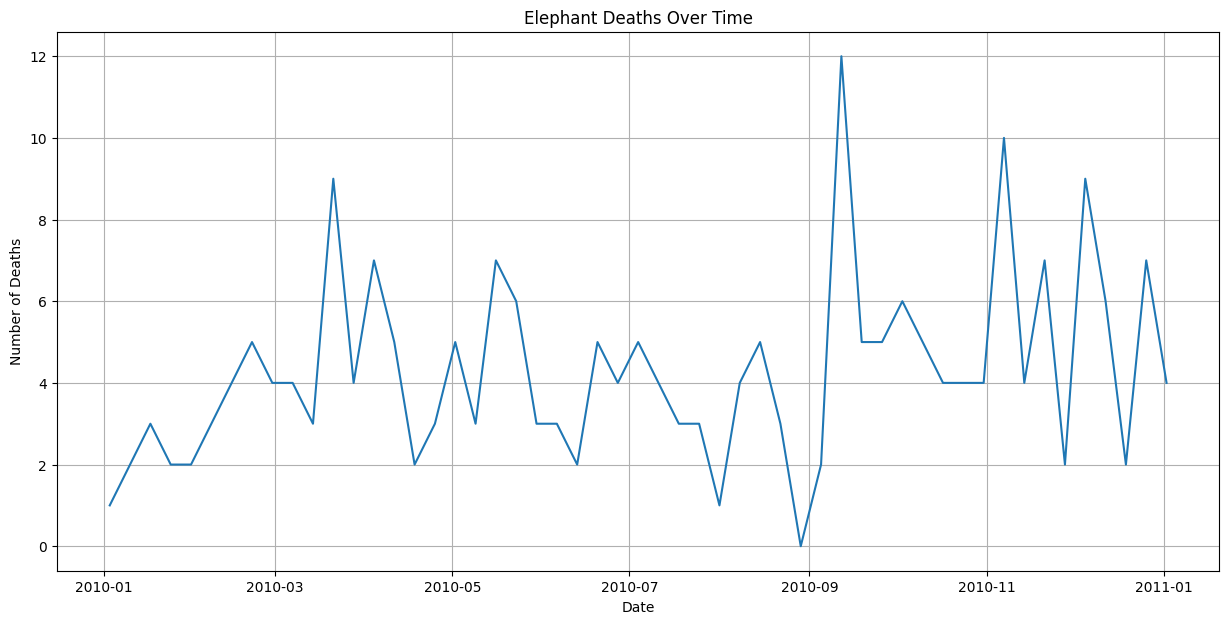

In [35]:
df2010['Date of Death'] = pd.to_datetime(df2010['Date of Death'])

# Set the 'Date of Death' column as the index for time series analysis
DF=df2010.set_index('Date of Death', inplace=False)

# Resample the data to get the count of elephant deaths by year
elephant_deaths_by_year2010 = DF['No'].resample('W').count()

# Plot the time series of elephant deaths over the years
plt.figure(figsize=(15, 7))
plt.plot(elephant_deaths_by_year2010)
plt.title('Elephant Deaths Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Deaths')
plt.grid(True)
plt.show()

# Region

In [39]:
df2010['Region'].value_counts()

Region
Polonnaruwa      74
North Western    66
Eastern          42
Southern         35
YalaBundala       8
Central           2
Name: count, dtype: int64

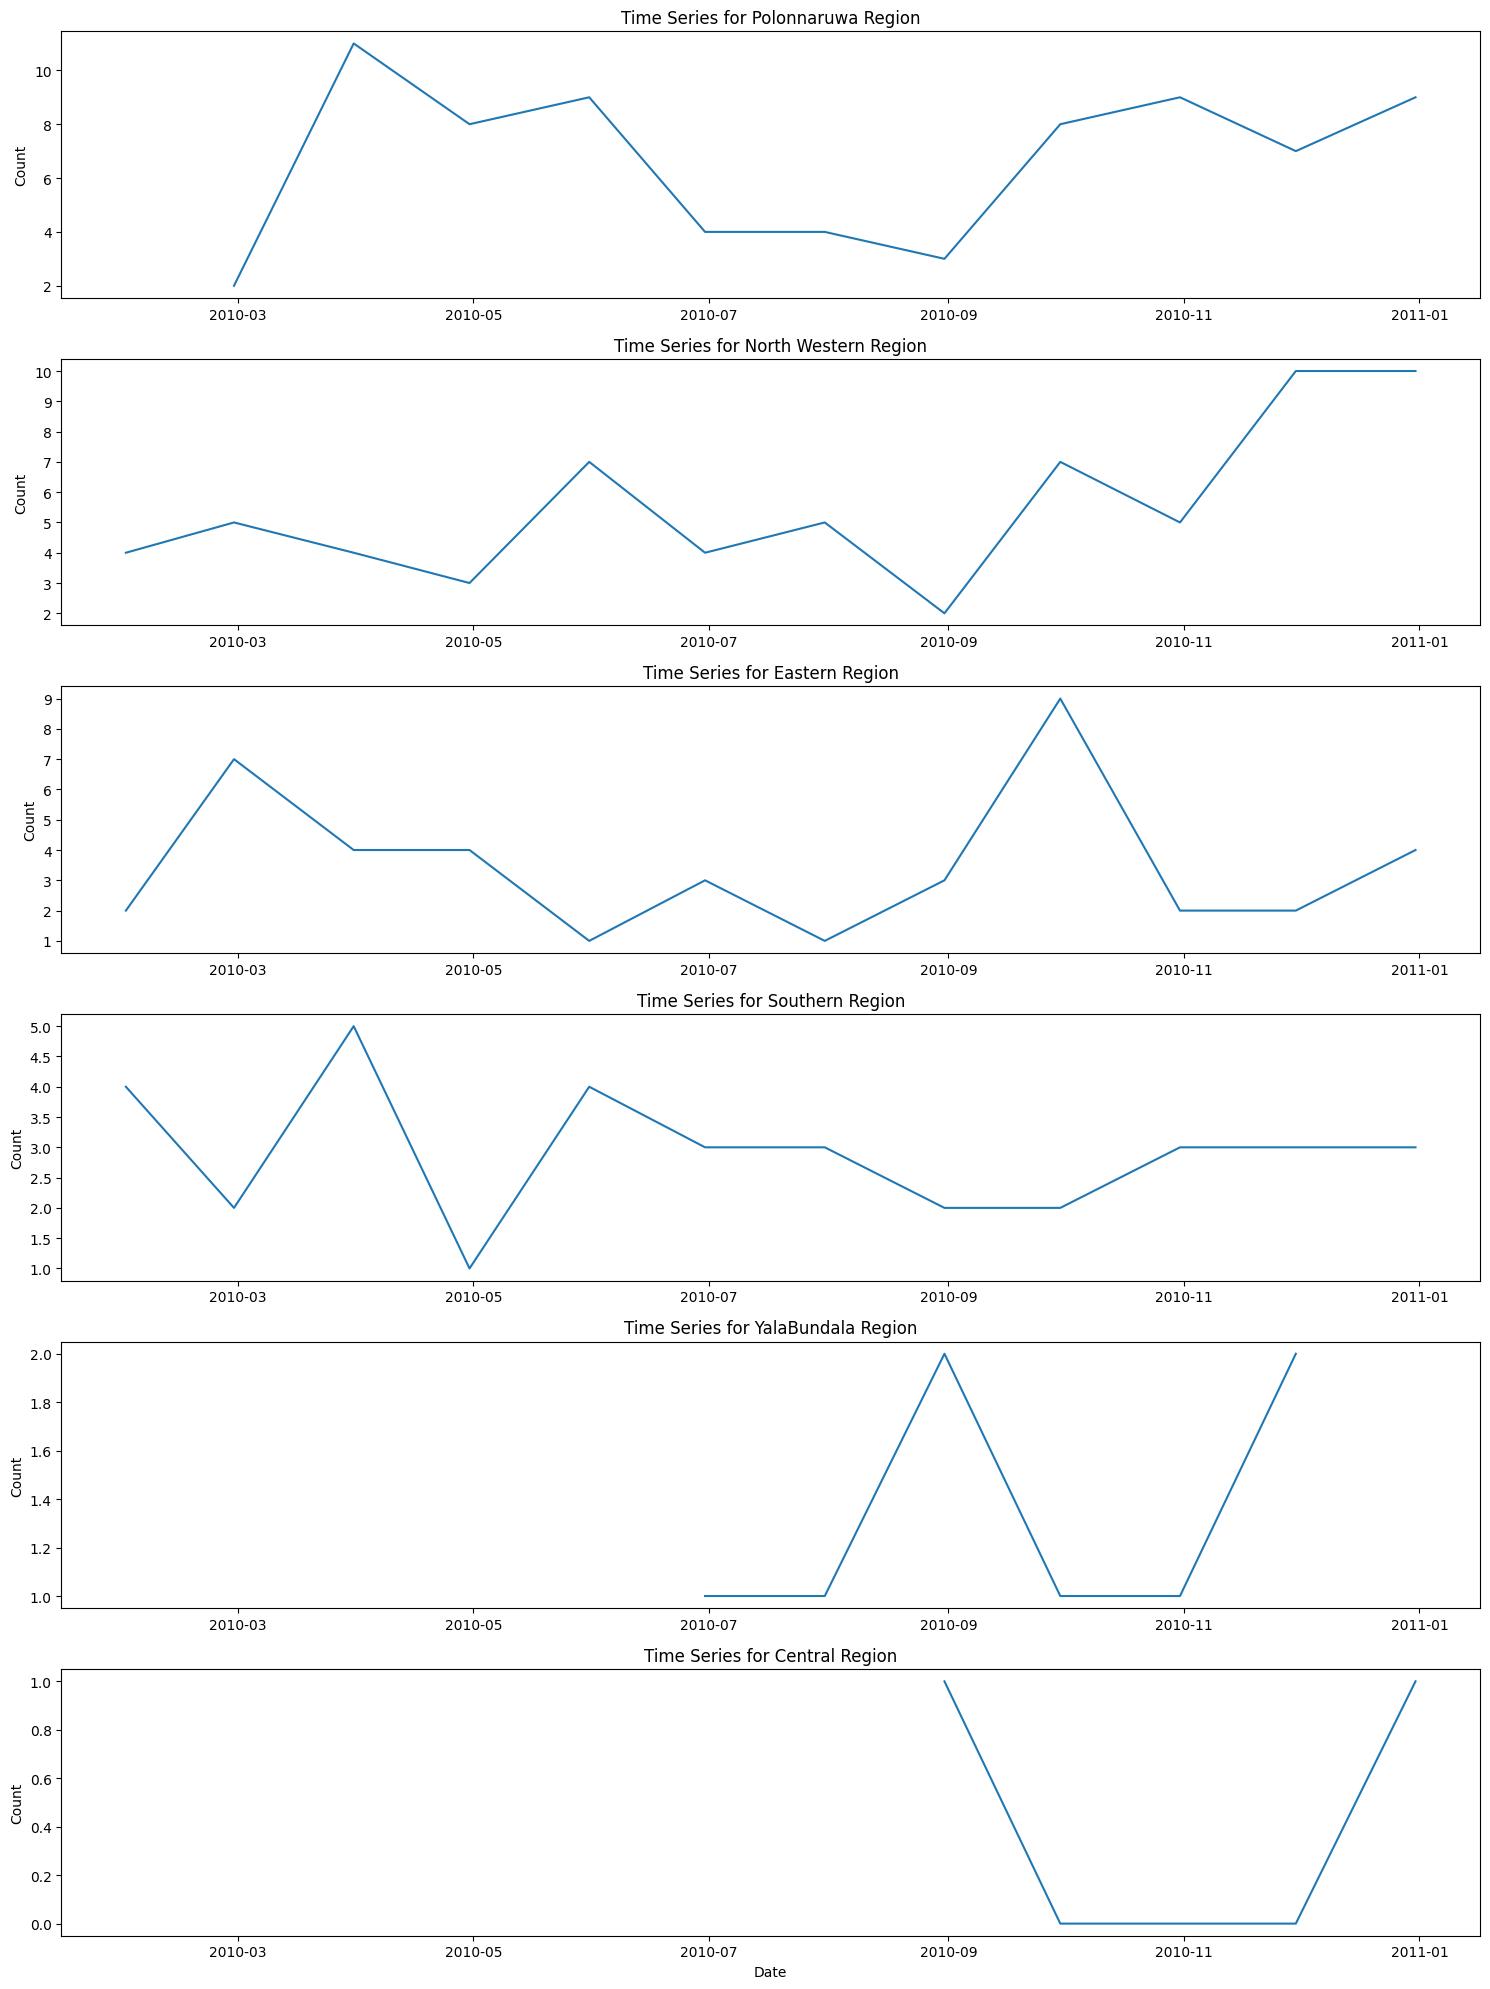

In [92]:
df2010['Date of Death'] = pd.to_datetime(df2010['Date of Death'])

# Group data by region and calculate the count of deaths in each region
region_counts = df2010['Region'].value_counts()

top_5_regions = region_counts.index

# Create subplots for each of the regions
fig, axes = plt.subplots(6, 1, figsize=(15, 20), sharex=True)

for i, region in enumerate(top_5_regions):
    region_data = df2010[df2010['Region'] == region]
    region_data = region_data.resample('M', on='Date of Death').count()
    
    axes[i].plot(region_data.index, region_data['Region'], label=region)
    axes[i].set_title(f'Time Series for {region} Region')
    axes[i].set_ylabel('Count')

    axes[i].xaxis.set_tick_params(labelbottom=True)


# Set a common x-axis label for the entire plot
axes[-1].set_xlabel('Date')

plt.tight_layout()
plt.show()

# District

In [44]:
df2010['District'].value_counts().size

16

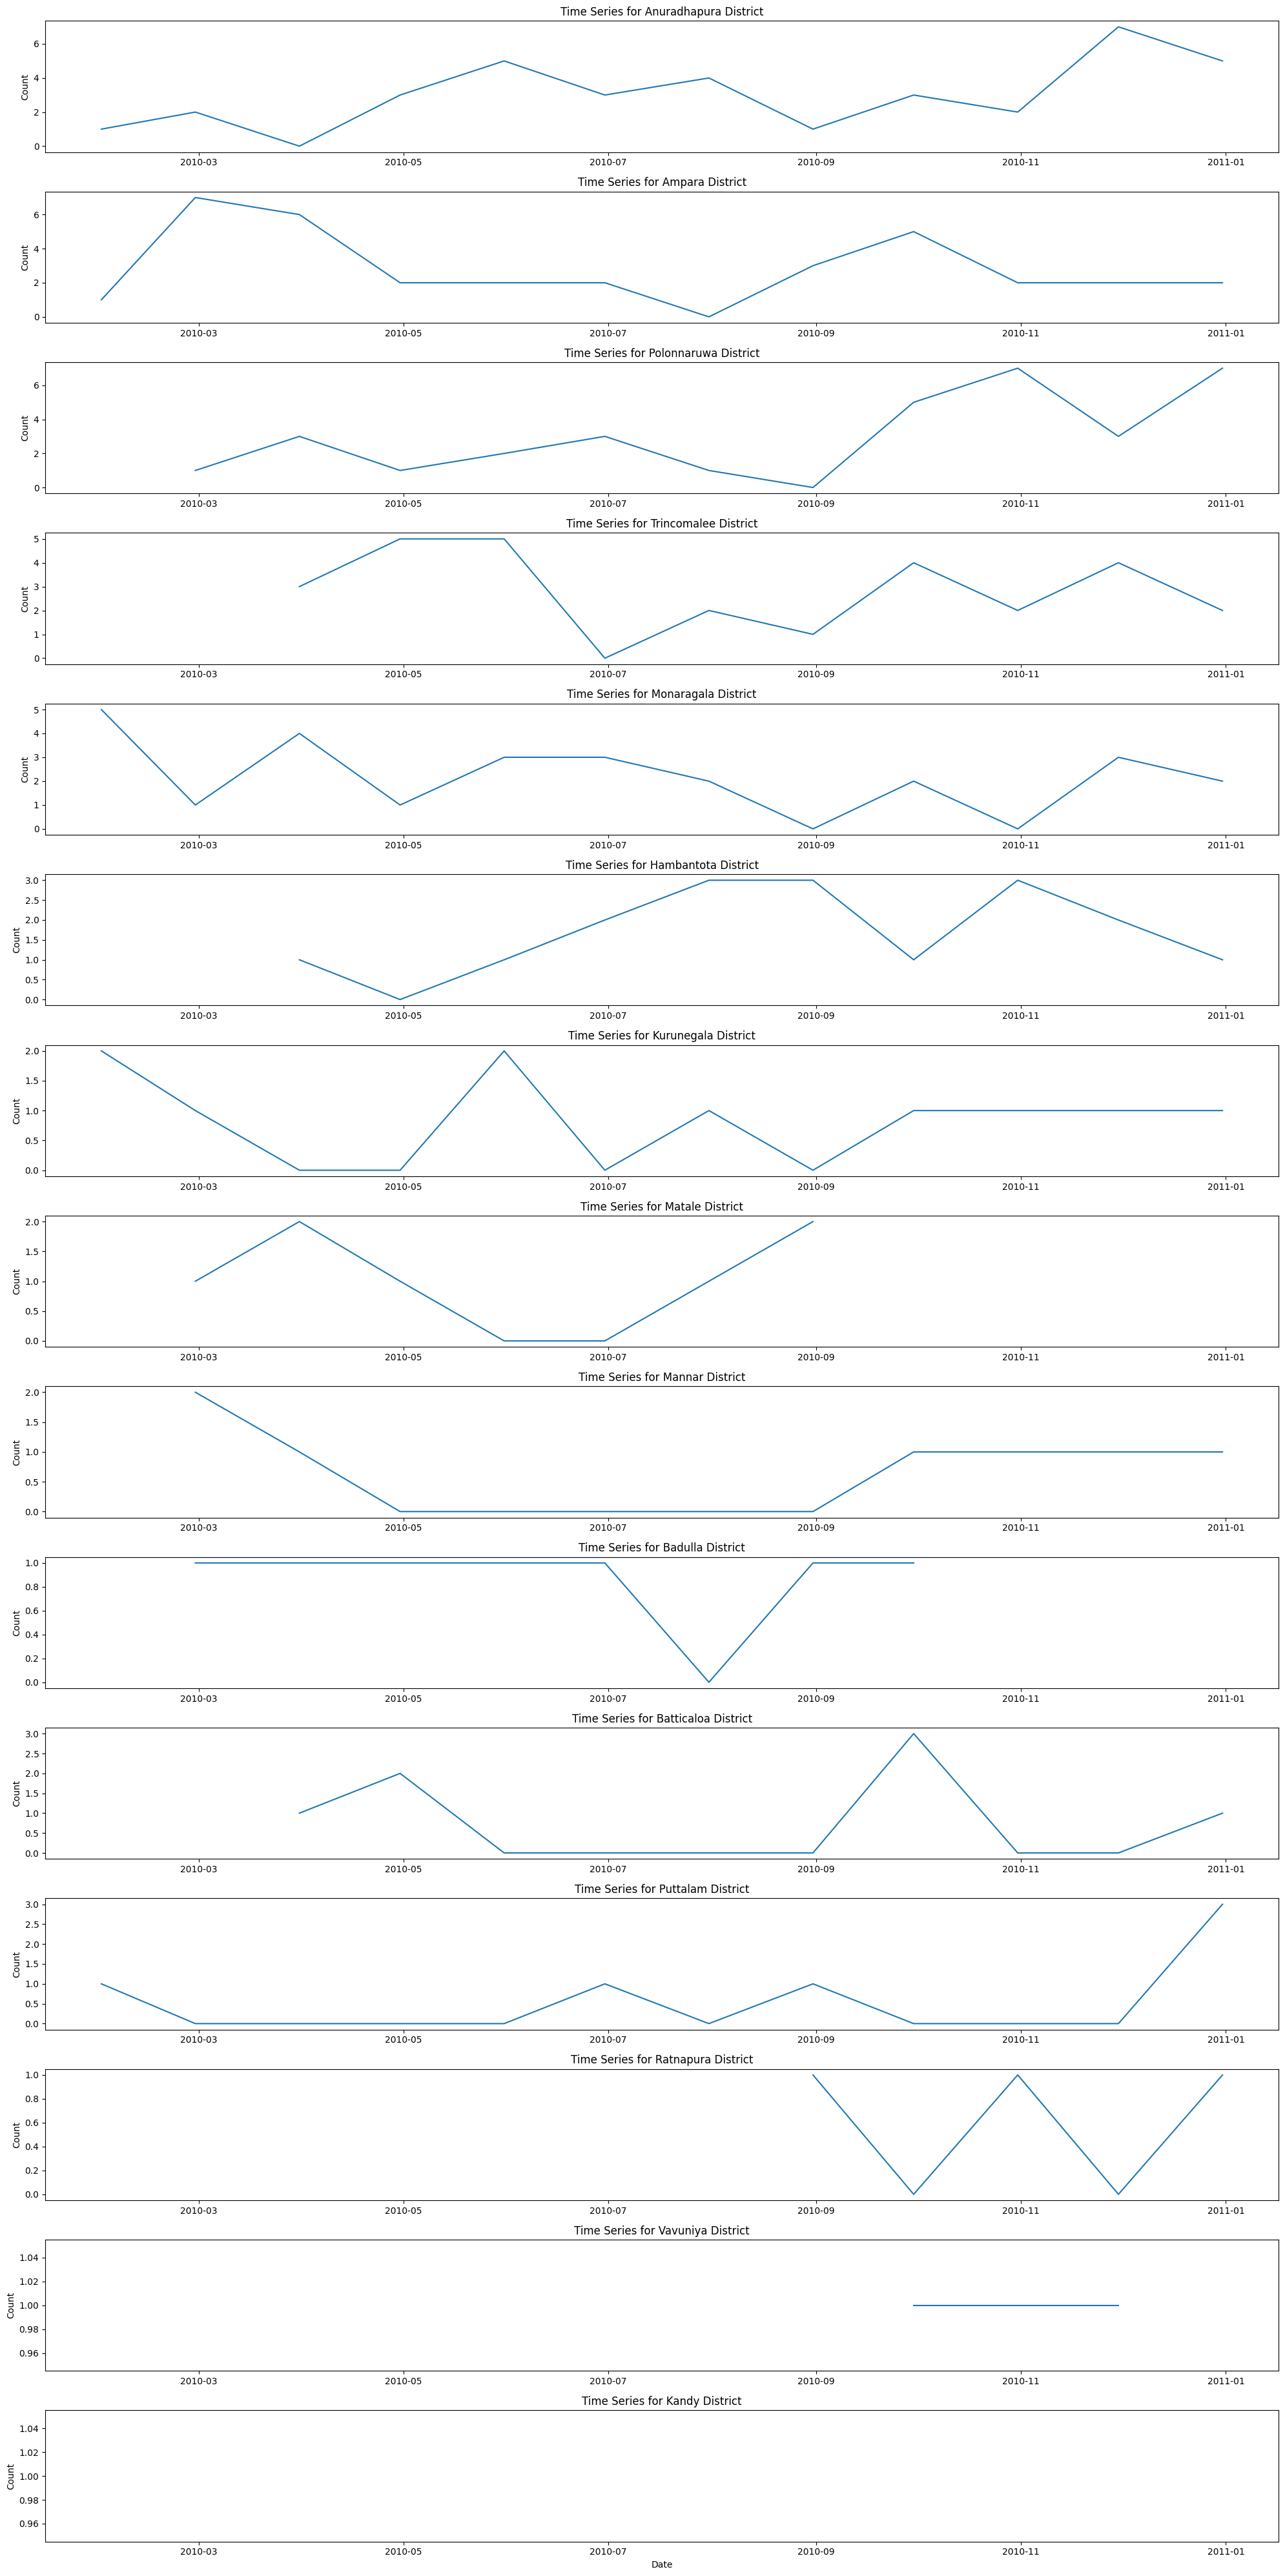

In [88]:
df2010d=df2010[df2010['District']!='Unknown']

district_counts = df2010d['District'].value_counts()

district = district_counts.index

# Create subplots for each of the district
fig, axes = plt.subplots(15, 1, figsize=(20, 40), sharex=True)

for i, district in enumerate(district):
    district_data = df2010d[df2010d['District'] == district]
    district_data = district_data.resample('M', on='Date of Death').count()
    
    axes[i].plot(district_data.index, district_data['District'], label=district)
    axes[i].set_title(f'Time Series for {district} District')
    axes[i].set_ylabel('Count')

    axes[i].xaxis.set_tick_params(labelbottom=True)
    


axes[-1].set_xlabel('Date')

plt.tight_layout()
plt.show()

In [89]:
df2010d[df2010d['District']=='Kandy']

,No,Region,District,D/S Office,Date of Death,Cause of Death,Sex,Age,Age Category
226,227,Central,Kandy,Ududumbara,2010-12-31,Poisned,Female,45,Subadults and adults


In [ ]:
df2010[df2010['District']=='Vavuniya']

,No,Region,District,D/S Office,Date of Death,Cause of Death,Sex,Age,Age Category
155,156,North Western,Vavuniya,Vawniya South,2010-09-30,Accident,Male,3-4,Calf
172,173,North Western,Vavuniya,Settikulama,2010-10-25,Gunshot,Male,3 Months,Infant
194,195,North Western,Vavuniya,Omanthe,2010-11-20,Hakkapatas,Male,3.5,Calf


## Gender

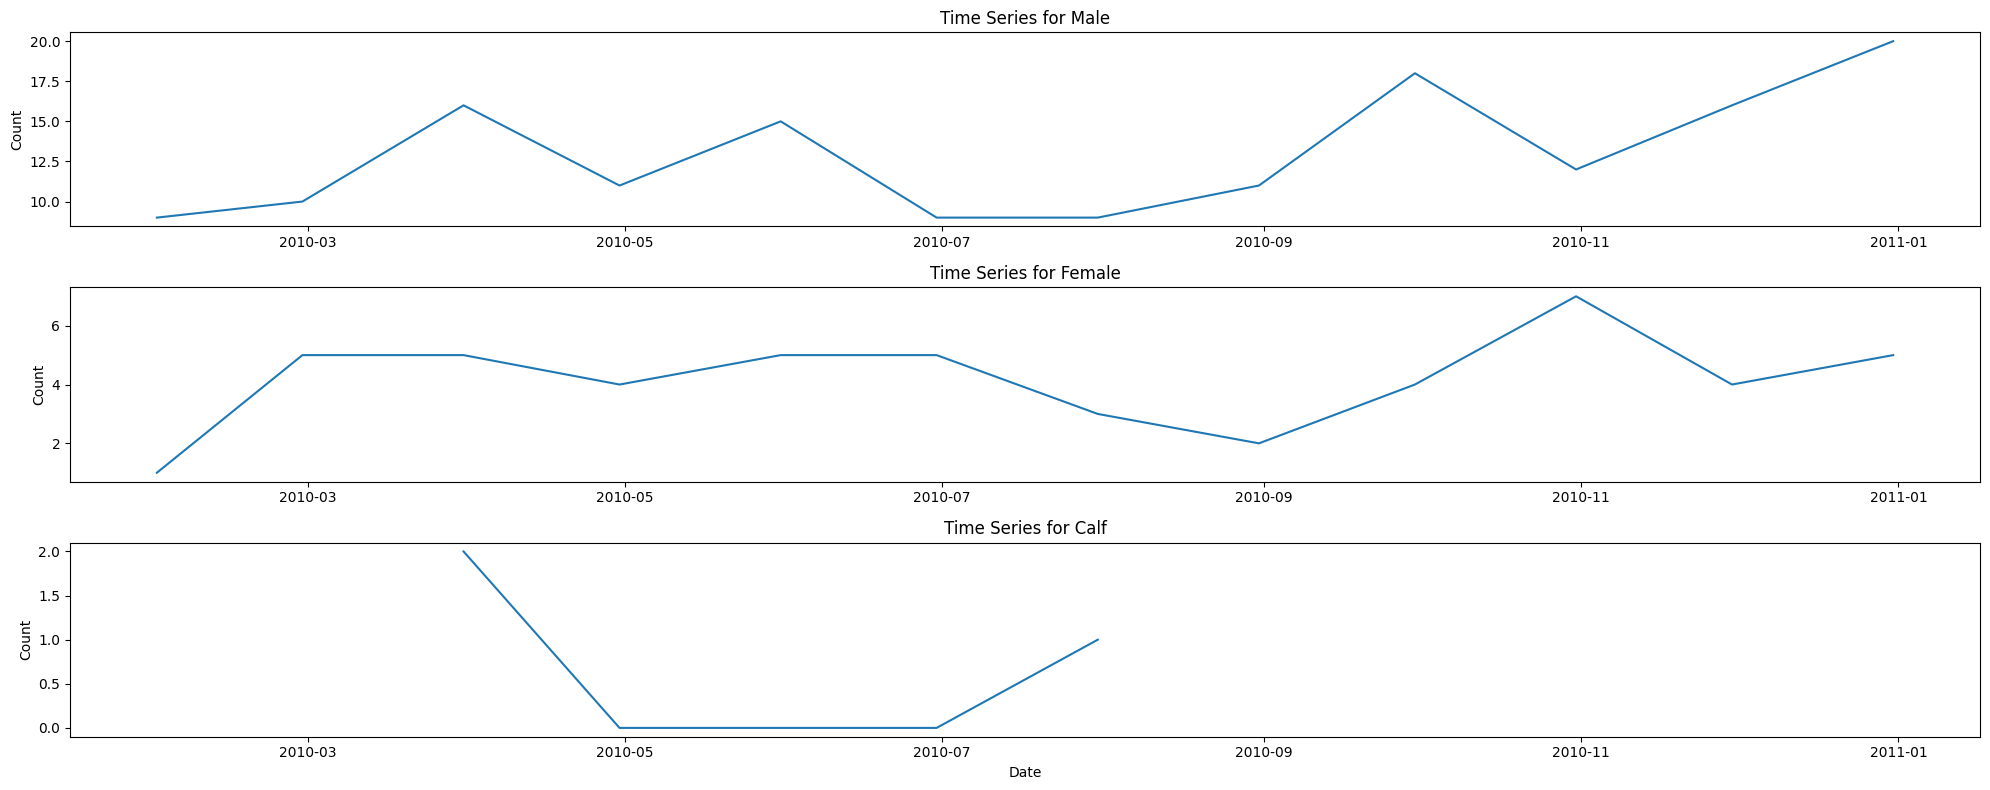

In [83]:
df2010s=df2010[df2010['Sex']!='Unknown']
sex_counts = df2010s['Sex'].value_counts()

sex = sex_counts.index

# Create subplots for each of the sex
fig, axes = plt.subplots(3, 1, figsize=(20, 8), sharex=True)

for i, sex in enumerate(sex):
    sex_data = df2010s[df2010s['Sex'] == sex]
    sex_data = sex_data.resample('M', on='Date of Death').count()
    
    axes[i].plot(sex_data.index, sex_data['Sex'], label=sex)
    axes[i].set_title(f'Time Series for {sex}')
    axes[i].set_ylabel('Count')

    axes[i].xaxis.set_tick_params(labelbottom=True)
    


axes[-1].set_xlabel('Date')

plt.tight_layout()
plt.show()

## Age Category

In [58]:
df2010['Age Category'].value_counts()

Age Category
Subadults and adults    163
Juvenile                 24
Calf                     17
Unknown                  15
Infant                    8
Name: count, dtype: int64

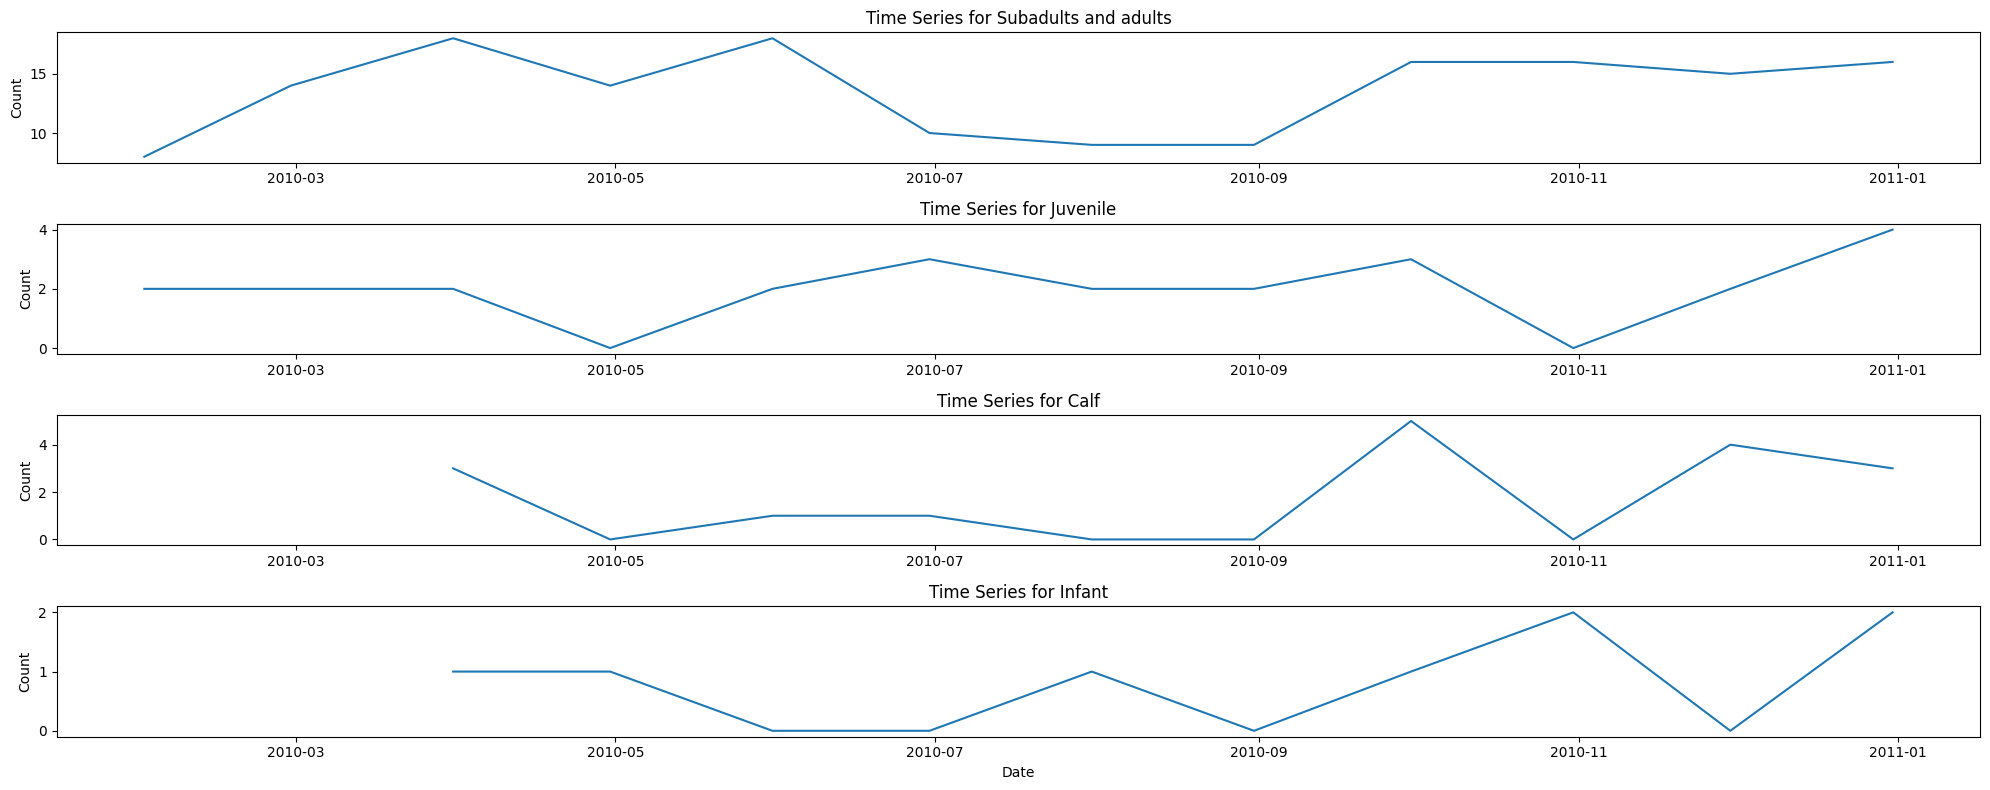

In [81]:
df2010a=df2010[df2010['Age Category']!='Unknown']

Age_Category_counts = df2010a['Age Category'].value_counts()

Age_Category = Age_Category_counts.index

# Create subplots for each of the Age Category
fig, axes = plt.subplots(4, 1, figsize=(20, 8), sharex=True)

for i, Age_Category in enumerate(Age_Category):
    Age_Category_data = df2010a[df2010a['Age Category'] == Age_Category]
    Age_Category_data = Age_Category_data.resample('M', on='Date of Death').count()
    
    axes[i].plot(Age_Category_data.index, Age_Category_data['Age Category'], label=Age_Category)
    axes[i].set_title(f'Time Series for {Age_Category}')
    axes[i].set_ylabel('Count')

    axes[i].xaxis.set_tick_params(labelbottom=True)
    


axes[-1].set_xlabel('Date')

plt.tight_layout()
plt.show()

## Cause of Death

In [95]:
df2010['Cause of Death'].value_counts().size

13

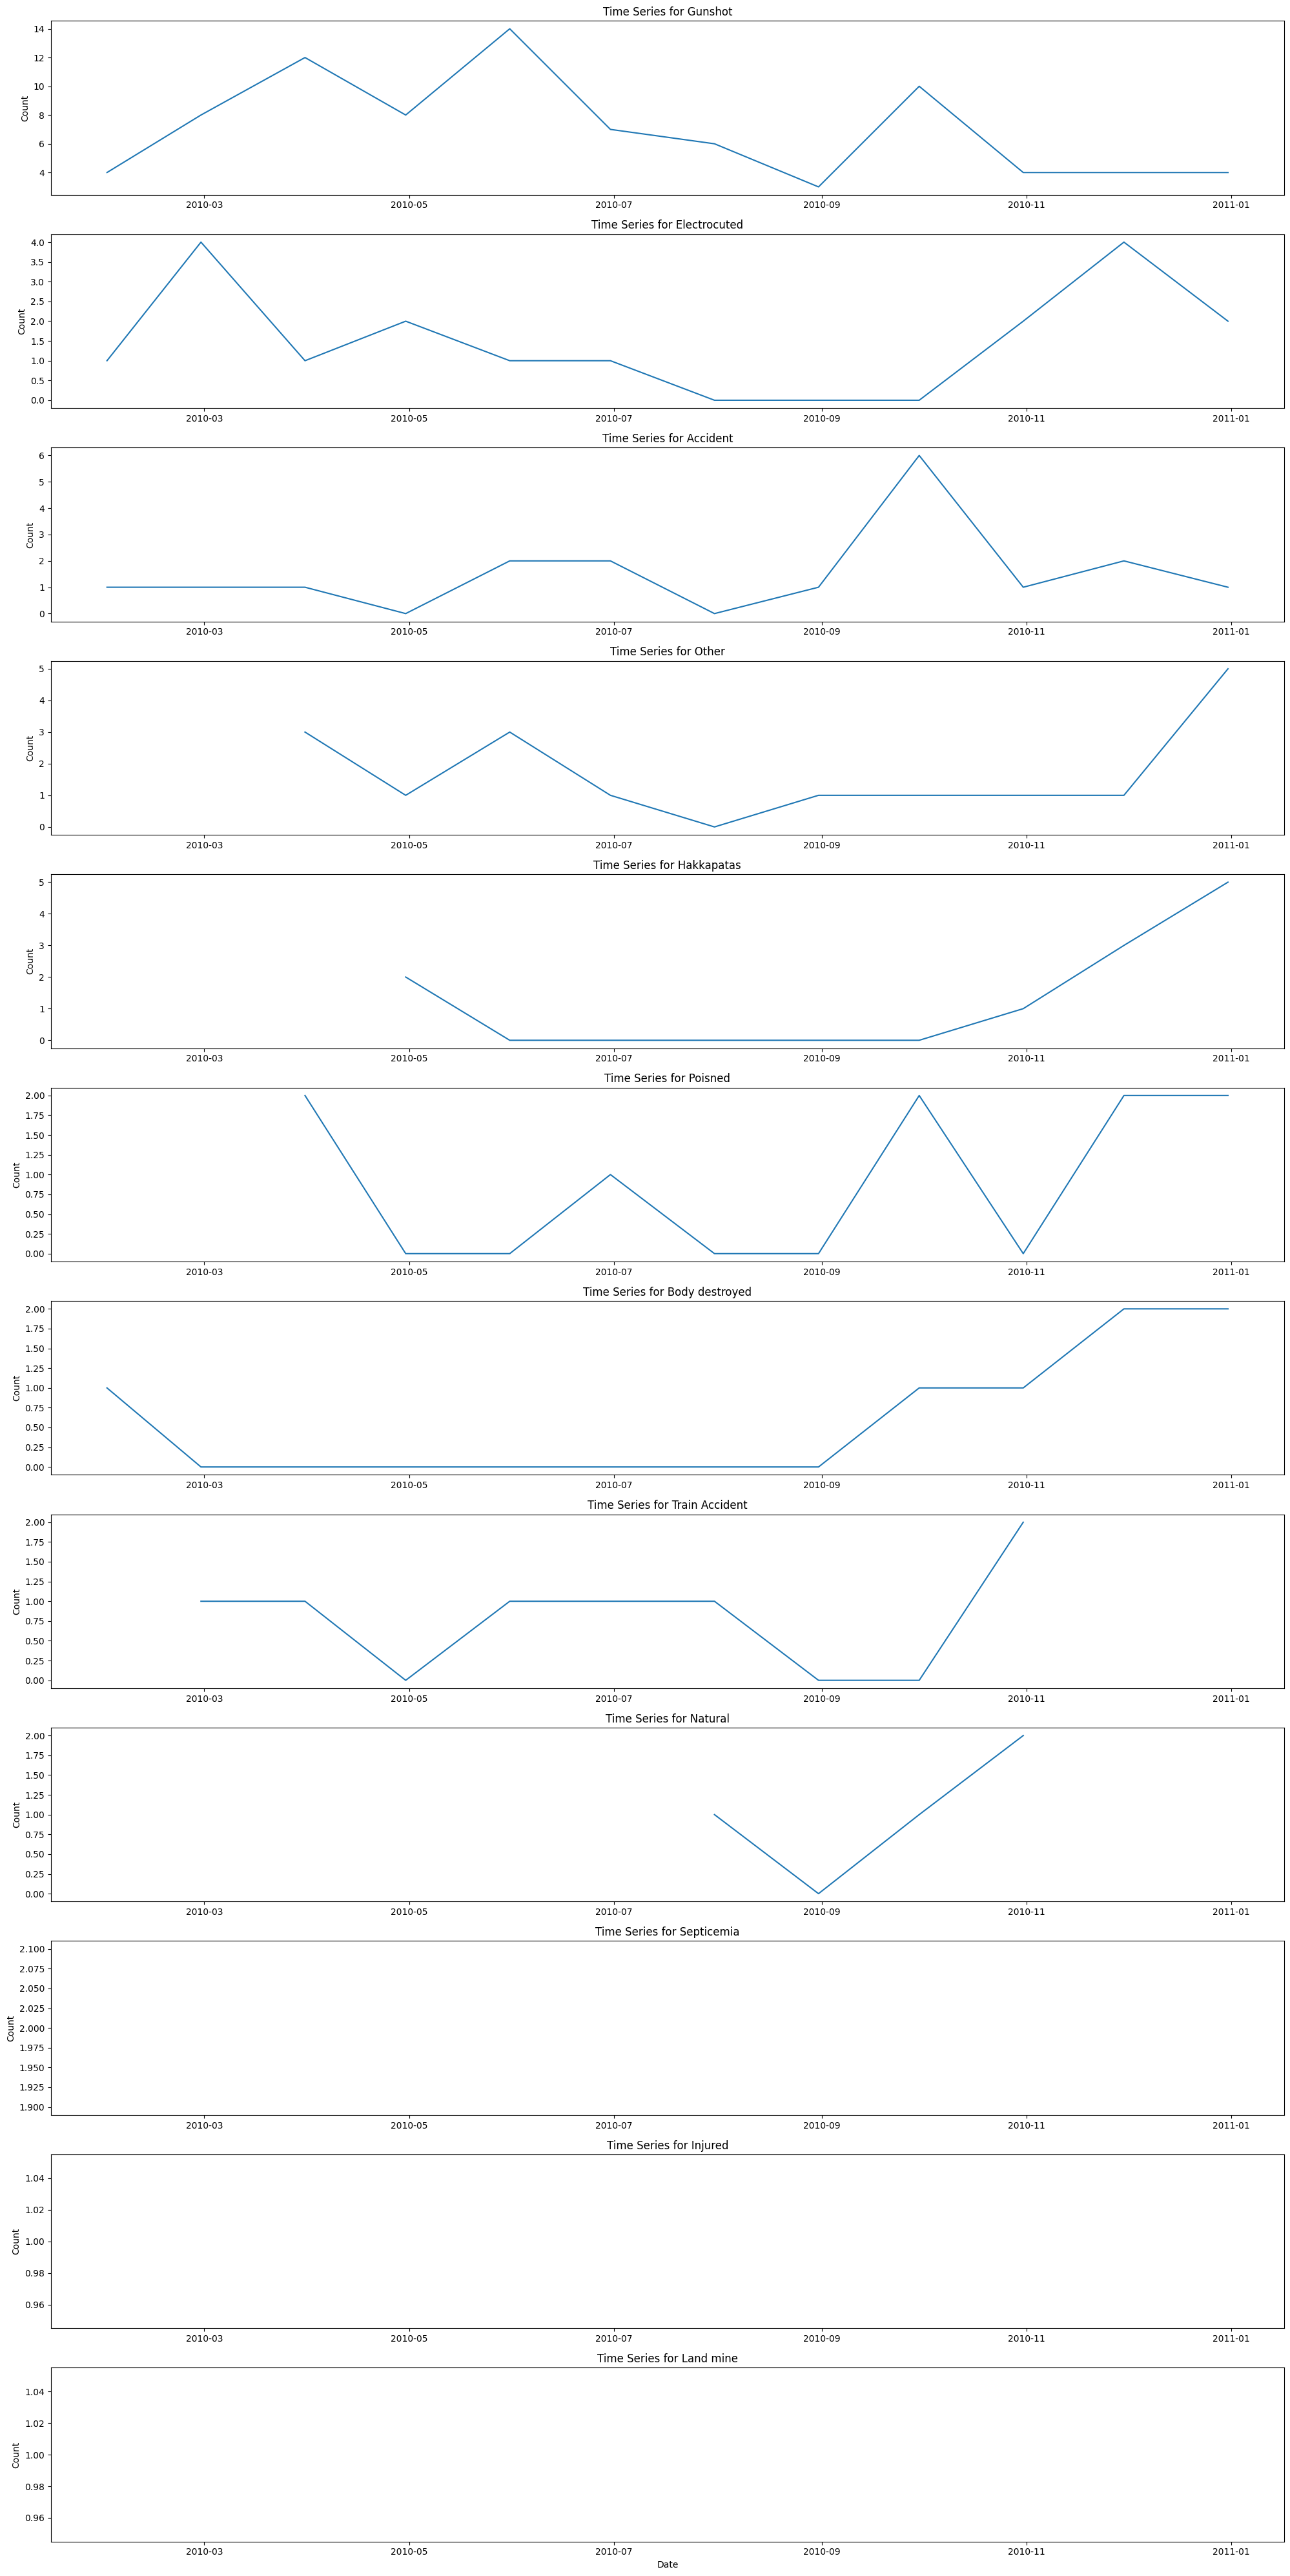

In [102]:
df2010c=df2010[df2010['Cause of Death']!='Unknown']
Cause_counts = df2010c['Cause of Death'].value_counts()

Cause = Cause_counts.index

# Create subplots for each of the Age Category
fig, axes = plt.subplots(12, 1, figsize=(20, 40), sharex=True)

for i, Cause in enumerate(Cause):
    Cause_data = df2010c[df2010c['Cause of Death'] == Cause]
    Cause_data = Cause_data.resample('M', on='Date of Death').count()
    
    axes[i].plot(Cause_data.index, Cause_data['Cause of Death'], label=Cause)
    axes[i].set_title(f'Time Series for {Cause}')
    axes[i].set_ylabel('Count')

    axes[i].xaxis.set_tick_params(labelbottom=True)
    


axes[-1].set_xlabel('Date')

plt.tight_layout()
plt.show()